In [1]:
from brian2 import *
%matplotlib inline
import numpy as np
import pytime
    
n = 28
nL1 = nL2 = n**2

[X,Y] = np.meshgrid(range(n), range(n))

taum = 10*ms
taue = 100*ms
taui = 100*ms
duration = 500*ms

dge = 200*mV

eqsPOISSON='''
rates : Hz
x : 1 (constant)
y : 1 (constant)
'''

eqsLGN='''
dv/dt  = (ge-gi-v)/taum : volt (unless refractory)
dge/dt = -ge/taue : volt
dgi/dt = -gi/taui : volt
x : 1 (constant)
y : 1 (constant)
'''

FR = 100*Hz

dist = mfr = np.zeros((6,6))

for qx in range(6):
    for qy in range(6):

        pat = np.zeros((28,28))
        dist[qx,qy] = sqrt(qx**2+qy**2)
        pat[12+qx:18+qx,12+qy:18+qy] = 1

        ############################################## Layer 1 ############################################################

        L1 = NeuronGroup(nL1,
                         eqsPOISSON,
                         threshold='rand()<rates*dt')

        L1.x = X.flatten()
        L1.y = Y.flatten()
        L1.rates = pat.flatten()*FR

        ############################################## Layer 2b ###########################################################

        nb = int(n/2)
        nL2b = nb**2
        [Xb,Yb] = np.meshgrid(range(nb), range(nb))

        L2b = NeuronGroup(nL2b,
                         eqsLGN,
                         threshold = 'v>0.3*volt',
                         reset = 'v=0*volt',
                         refractory = 5*ms,
                         method = 'euler')

        L2b.x = Xb.flatten()
        L2b.y = Yb.flatten()

        e1b = Synapses(L1, L2b, on_pre='ge += 1/4*dge')
        e1b.connect(condition = '(x_post==x_pre/2 or x_post==(x_pre-1)/2) and (y_post==y_pre/2 or y_post==(y_pre-1)/2)')

        ############################################## Layer 3b ###########################################################

        L3b = NeuronGroup(nL2b,
                         eqsLGN,
                         threshold = 'v>0.3*volt',
                         reset = 'v=0*volt',
                         refractory = 5*ms,
                         method = 'euler')

        L3b.x = Xb.flatten()
        L3b.y = Yb.flatten()

        e2b = Synapses(L2b, L3b, on_pre='ge += dge')
        e2b.connect(condition = 'i==j')
        i2b = Synapses(L2b, L3b, on_pre='gi += 1/8*dge')
        #i2b.connect(condition = 'sqrt((x_pre-x_post)**2+(y_pre-y_post)**2)<2 and i!=j')

        sp = SpikeMonitor(L3b)
        run(duration)
        mfr[qx,qy] = sp.count[6*14+6]/duration

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


##  Case 0) No lateral inhibition

Text(0.5, 1.0, 'Tuning curve')

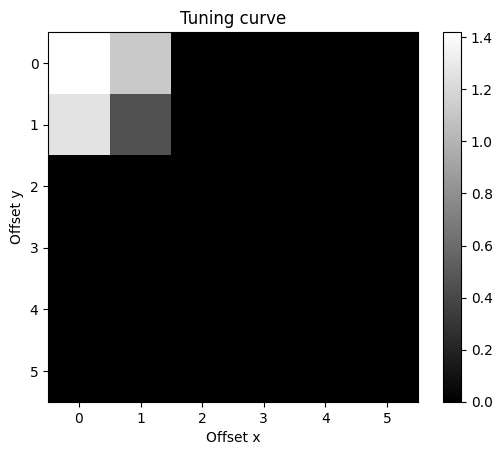

In [3]:
plt.imshow(mfr*Hz/FR,cmap='gray')
xlabel('Offset x')
ylabel('Offset y')
colorbar()
title('Tuning curve')

##  Case A) $\tau_i = 5 ms$

Text(0.5, 1.0, 'Tuning curve')

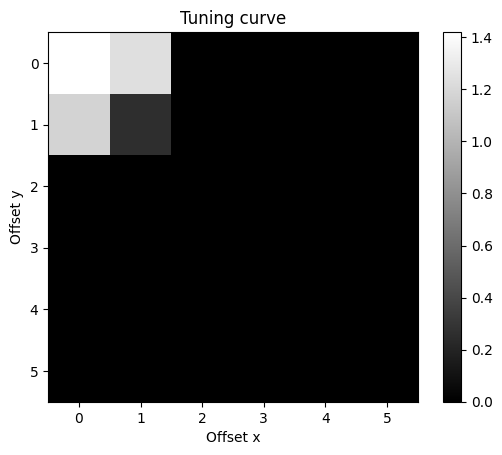

In [12]:
plt.imshow(mfr*Hz/FR,cmap='gray')
xlabel('Offset x')
ylabel('Offset y')
colorbar()
title('Tuning curve')

##  Case B) $\tau_i = 10 ms$

Text(0.5, 1.0, 'Tuning curve')

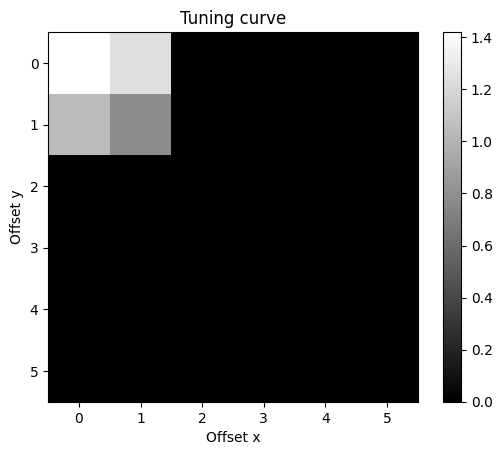

In [14]:
plt.imshow(mfr*Hz/FR,cmap='gray')
xlabel('Offset x')
ylabel('Offset y')
colorbar()
title('Tuning curve')

##  Case C) $\tau_i = 50 ms$

Text(0.5, 1.0, 'Tuning curve')

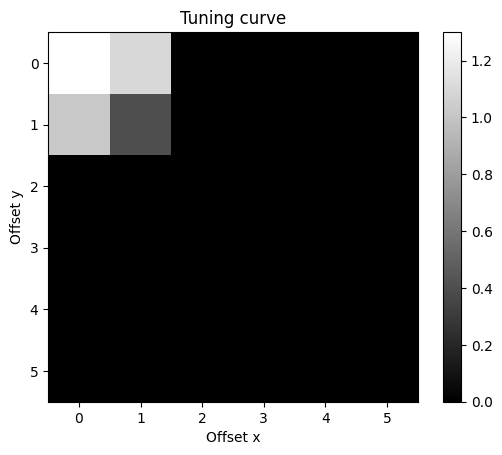

In [16]:
plt.imshow(mfr*Hz/FR,cmap='gray')
xlabel('Offset x')
ylabel('Offset y')
colorbar()
title('Tuning curve')

##  Case D) $\tau_i = 100 ms$

Text(0.5, 1.0, 'Tuning curve')

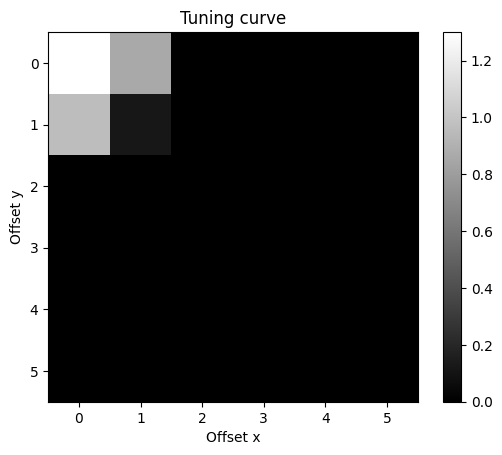

In [18]:
plt.imshow(mfr*Hz/FR,cmap='gray')
xlabel('Offset x')
ylabel('Offset y')
colorbar()
title('Tuning curve')